This notebook analyzes the Brenda database to highlight trends in what type of sequences have been characterized<br/><br/>Copyright (C) 2019  Martin Engqvist Lab<br/>This program is free software: you can redistribute it and/or modify<br/>it under the terms of the GNU General Public License as published by<br/>the Free Software Foundation, either version 3 of the License, or<br/>(at your option) any later version.<br/>This program is distributed in the hope that it will be useful,<br/>but WITHOUT ANY WARRANTY; without even the implied warranty of<br/>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br/>GNU General Public License for more details.<br/>You should have received a copy of the GNU General Public License<br/>along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = 'brenda_2019_2'
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))

print('Standard variables loaded, you are good to go!')

Standard variables loaded, you are good to go!


In [2]:


from matplotlib.ticker import MaxNLocator

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import matplotlib.gridspec as gridspec

### Make some plots with the data

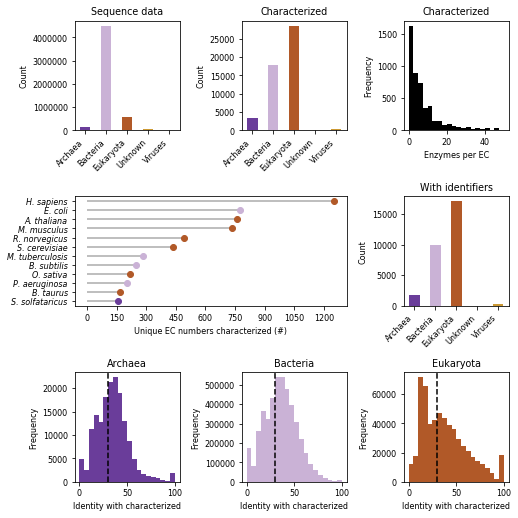

In [3]:
# define font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)



def cm2inch(*tupl):
    '''
    https://stackoverflow.com/questions/14708695/specify-figure-size-in-centimeter-in-matplotlib
    '''
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


    
filepath = join(INTERMEDIATE, 'BRENDA_for_paper', 'parsed_info', 'ec_data_uid_orgs_domain_2.tsv')
df_html_uid = pd.read_csv(filepath, sep='\t')

filepath = join(INTERMEDIATE, 'BRENDA_for_paper', 'parsed_info', 'ec_data_all_orgs_domain_2.tsv')
df_html = pd.read_csv(filepath, sep='\t')

df_html_combined = df_html_uid.drop('uid', axis=1).append(df_html) # combine to one frame

filepath = join(INTERMEDIATE, 'BRENDA_for_paper', 'parsed_info', 'fasta_data_ec_uid_orgs_domain_2_kdist_aln.tsv')
df_fasta = pd.read_csv(filepath, sep='\t')


arch_col = '#6a3d9a'
bact_col = '#cab2d6'
euk_col = '#b15928'
other_col = '#cc9933'


ncols = 3
nrows = 3



fig1 = plt.figure(figsize=cm2inch(18, 18), constrained_layout=True)
gs = fig1.add_gridspec(nrows, ncols)


################
## First plot ##
################
f1_ax1 = fig1.add_subplot(gs[0, 0:1])

df_fasta.groupby('domain').count()['ec'].plot(kind='bar', 
                                                 color=[arch_col, bact_col, euk_col, 
                                                        other_col, other_col])
plt.title('Sequence data')
plt.ylabel('Count')
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')

#################
## Second plot ##
#################
f1_ax2 = fig1.add_subplot(gs[0, 1:2])

df_html_combined.groupby('domain').count()['ec'].plot(kind='bar', 
                                                 color=[arch_col, bact_col, euk_col, 
                                                        other_col, other_col])
plt.title('Characterized')
plt.ylabel('Count')
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')


################
## Third plot ##
################
f1_ax3 = fig1.add_subplot(gs[0, 2:3])

plt.hist(df_html_combined.groupby('ec').count()['organism'].reset_index()['organism'], 
         bins=20, 
         range=(0, 50),
         color='black')
plt.title('Characterized')
plt.xlabel('Enzymes per EC')
plt.ylabel('Frequency')


#################
## Fourth plot ##
#################
f1_ax4 = fig1.add_subplot(gs[1, 0:2])

top_orgs = df_html_combined.groupby('organism').nunique()['ec'].nlargest(12)

labels = list(top_orgs.index)
labels.reverse()

# asign colors
colors = []
for l in labels:
    dom = df_html[df_html['organism']==l].domain.unique()[0]
    if dom == 'Eukaryota':
        colors.append(euk_col)
        
    elif dom == 'Archaea':
        colors.append(arch_col)
        
    elif dom == 'Bacteria':
        colors.append(bact_col)
        
    else:
        colors.append(other_col)
        

labels = ['%s. %s' % (s[0], s.split()[1]) for s in labels] # shorten organism name

values = list(top_orgs.values)
values.reverse()



# plot the lines
for i, org in enumerate(labels):
    plt.hlines(y=org, xmin=0, xmax=values[i], color='#ababab')
    plt.plot(values[i], org, "o", color=colors[i])


# Add titles and axis names
plt.yticks(labels, fontstyle='italic')
plt.xlabel('Unique EC numbers characterized (#)')

plt.xticks(np.arange(0, 1500, step=250))
f1_ax4.xaxis.set_major_locator(MaxNLocator(integer=True))


################
## Fifth plot ##
################
f1_ax5 = fig1.add_subplot(gs[1, 2:3])

df_html_uid.groupby('domain').count()['ec'].plot(kind='bar', 
                                                 color=[arch_col, bact_col, euk_col, 
                                                        other_col, other_col])
plt.title('With identifiers')
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

################
## Sixth plot ##
################
f1_ax6 = fig1.add_subplot(gs[2, 0:1])

#plt.axvspan(xmin=0, xmax=30, facecolor='#cdcbc9') # grey box
f1_ax6.axvline(x=30, color='black', ls='--')

plt.hist(df_fasta[df_fasta['domain'] == 'Archaea'].identity, 
         bins=20, 
         range=(0, 100),
         color=arch_col)
plt.xlabel('Identity with characterized')
plt.ylabel('Frequency')
plt.title('Archaea')


##################
## Seventh plot ##
##################
f1_ax7 = fig1.add_subplot(gs[2, 1:2])

#plt.axvspan(xmin=0, xmax=30, facecolor='#cdcbc9') # grey box
f1_ax7.axvline(x=30, color='black', ls='--')

plt.hist(df_fasta[df_fasta['domain'] == 'Bacteria'].identity, 
         bins=20, 
         range=(0, 100),
         color=bact_col)
plt.xlabel('Identity with characterized')
plt.ylabel('Frequency')
plt.title('Bacteria')

#################
## Eighth plot ##
#################
f1_ax8 = fig1.add_subplot(gs[2, 2:3])

#plt.axvspan(xmin=0, xmax=30, facecolor='#cdcbc9') # grey box
f1_ax8.axvline(x=30, color='black', ls='--')

plt.hist(df_fasta[df_fasta['domain'] == 'Eukaryota'].identity, 
         bins=20, 
         range=(0, 100),
         color=euk_col)

#rect = matplotlib.patches.Rectangle((0, 0), width=30, height=f1_ax8.get_ylim()[1], fill='#cdcbc9')
#f1_ax8.add_patch(rect)
plt.xlabel('Identity with characterized')
plt.ylabel('Frequency')
plt.title('Eukaryota')


plt.savefig(join(FIGURES, 'superkingdom_count.png'), dpi=300, 
        facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)


plt.savefig(join(FIGURES, 'superkingdom_count.pdf'),
        facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

### For each EC class, calculate percentage of sequences below 30% identity

In [88]:
# find the sequences that are below 30% identity
mask = df_fasta['identity'] <= 30
df_fasta['under_30'] = mask

# calculate percentage under 30% identity for each ec class
df_under_30 = 100 * df_fasta.groupby('ec')['under_30'].sum() / df_fasta.groupby('ec')['under_30'].count()

print('Total %s EC numbers.' % len(df_under_30.values))
print('Of these %s have more than half of sequences below identity threshold.' % len(df_under_30[df_under_30.values > 50]))

ec_num = '1.1.3.15'
print('The EC class %s has %s %% of sequences below 30 %% identity to characterized ones.' % 
      (ec_num, round(df_under_30[df_under_30.index == ec_num].values[0])))

Total 5954 EC numbers.
Of these 2241 have more than half of sequences below identity threshold.
The EC class 1.1.3.15 has 84.0 % of sequences below 30 % identity to characterized ones.


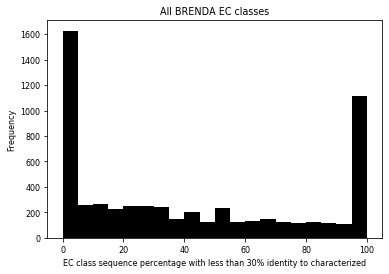

In [99]:
plt.hist(df_under_30.values, 
         bins=20, 
         range=(0, 100),
         color='black')
plt.xlabel('EC class sequence percentage with less than 30% identity to characterized')
plt.ylabel('Frequency')
plt.title('All BRENDA EC classes')

plt.savefig(join(FIGURES, 'ec_class_proportion_below_30_percent_ident.png'), dpi=300, 
        facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.savefig(join(FIGURES, 'ec_class_proportion_below_30_percent_ident.pdf'),
        facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

# Some random things...

In [4]:
df_html_combined.groupby('organism').nunique()['ec'].nlargest(12)

organism
Homo sapiens                  1253
Escherichia coli               773
Arabidopsis thaliana           758
Mus musculus                   736
Rattus norvegicus              489
Saccharomyces cerevisiae       437
Mycobacterium tuberculosis     286
Bacillus subtilis              249
Oryza sativa                   216
Pseudomonas aeruginosa         203
Bos taurus                     166
Saccharolobus solfataricus     159
Name: ec, dtype: int64

In [5]:
df_html.describe()

,ec,organism,domain
count,21188,21188,21188
unique,5006,3727,5
top,3.2.1.8,Homo sapiens,Eukaryota
freq,85,1253,11534


(array([  0.,  18., 413., 429.,  15.,  27.,  33.,  56.,  27.,   7.,   3.,
          5.,   4.,   2.,   1.,   4.,   4.,   6.,   1.,  16.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

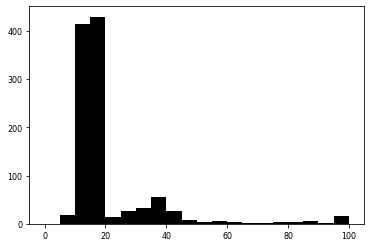

In [19]:
new_df = df_fasta[df_fasta.ec == '1.1.3.15']


plt.hist(new_df.identity, 
         bins=20, 
         range=(0, 100),
         color='black')

In [6]:
df_html_uid.describe()

,ec,organism,uid,domain
count,29084,29084,29084,29084
unique,5006,3727,27127,5
top,2.7.11.1,Homo sapiens,Q975F9,Eukaryota
freq,323,2594,11,16990


In [7]:
df_html_combined.describe()

,ec,organism,domain
count,50272,50272,50272
unique,5006,3727,5
top,2.7.11.1,Homo sapiens,Eukaryota
freq,373,3847,28524


In [8]:
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
          '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#cc9933', '#b15928']
colors.reverse()
    
    
    
### Need to make sure I include all data in the fourth plot above, that including uids and that not including it.
    